In [368]:
import numpy as np
import pandas as pd

import os

from duncan_test import duncan_test

import ipywidgets as widgets

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from statannotations.Annotator import Annotator

In [369]:
def drop_zero_cols(df):
    df = df.dropna(axis=1, how='all') # Drop columns with all NaN values
    df.replace(" ", 0, inplace=True)
    df = df.loc[:, (df != 0).any(axis=0)] # Drop columns with all zero values
    return df

#function to compute richness of a community 
def richness(list):

    are_all_numbers = all(isinstance(x, (int, float)) for x in list)

    assert are_all_numbers, "All elements in the list must be numbers"

    return np.count_nonzero( list )

#function to compute Shannon's diversity index 
def shannon_idx(list):
    
    #assert 0 not in list, "All elements in the list must be non-zero!"
    idx = 0
    for l in list:
        if l != 0:
            idx += -l*np.log(l) 
    #assert sum(list) == 1, "Elements of the list must sum to 1!"
    return idx

In [370]:
#df = pd.read_excel("C:/Users/edoardo.marchi/Dropbox/microbiome/SoilHealth-Fungi_mod.xlsx", skiprows=3) 
df = pd.read_excel("C:/Users/edo13/Dropbox/microbiome/SoilHealth-Fungi_mod.xlsx", skiprows=3) 

In [371]:
# keeping only abiotic data

#df_ab = df[["TREAT", "Season", "S.M", "OM", "EC-(ds/m)", "pH", 'TN-(%)', 'OC-(%)', 'C:N']]

df_ab = df[["SITE", "TREAT", "Season", "S.M", "OM", "EC-(ds/m)", "pH", 'TN-(%)', 'OC-(%)', 'C:N',
 'Ascomycota', 
 'Basidiomycota',
 'Chytridiomycota',
 'Glomeromycota',
 'Mortierellomycota',
 'Mucoromycota',
 'Rozellomycota',
 'Olpidiomycota',
 'uni']]

# creating a list of phyla 
# discard Kickxellomycota since they're extremely rare 

phyla_list = [ 'Ascomycota', 
 'Mortierellomycota',
 'uni',
 'Basidiomycota',
 'Chytridiomycota',
 'Glomeromycota',
 'Mucoromycota',
 'Rozellomycota',
 'Olpidiomycota'
 ] 

#creating a list of abiotic

abiotic = ["S.M", "OM", "EC-(ds/m)", 'pH', 'TN-(%)', 'OC-(%)', 'C:N']

# standardize abiotics(subtract the average, divide by the std)
#for ab in abiotic:
#   df_ab[ab] = ( df_ab[ab]-df_ab[ab].mean() )/df_ab[ab].std()

In [372]:
# compute normalization
norm=df_ab[phyla_list].sum(axis=1, numeric_only=True)

In [373]:
# keep only non-zero rows
df_ab=df_ab.iloc[norm[norm.values>0.].index]
norm=norm[norm.values>0.]

#df_ab = df_ab.reset_index(drop=True)

# rescale phyla values to [0, 1]

for phyla in phyla_list:
    df_ab[phyla] = df_ab[phyla]/norm

In [374]:
# dataset where we replace nan with zeros. In some cases we need to use this. 

df_ab_mod = df_ab.fillna(0.)

df_ab_mod = df_ab_mod.replace(" ", 0)

# PHYLA ABUNDANCES STACKPLOT

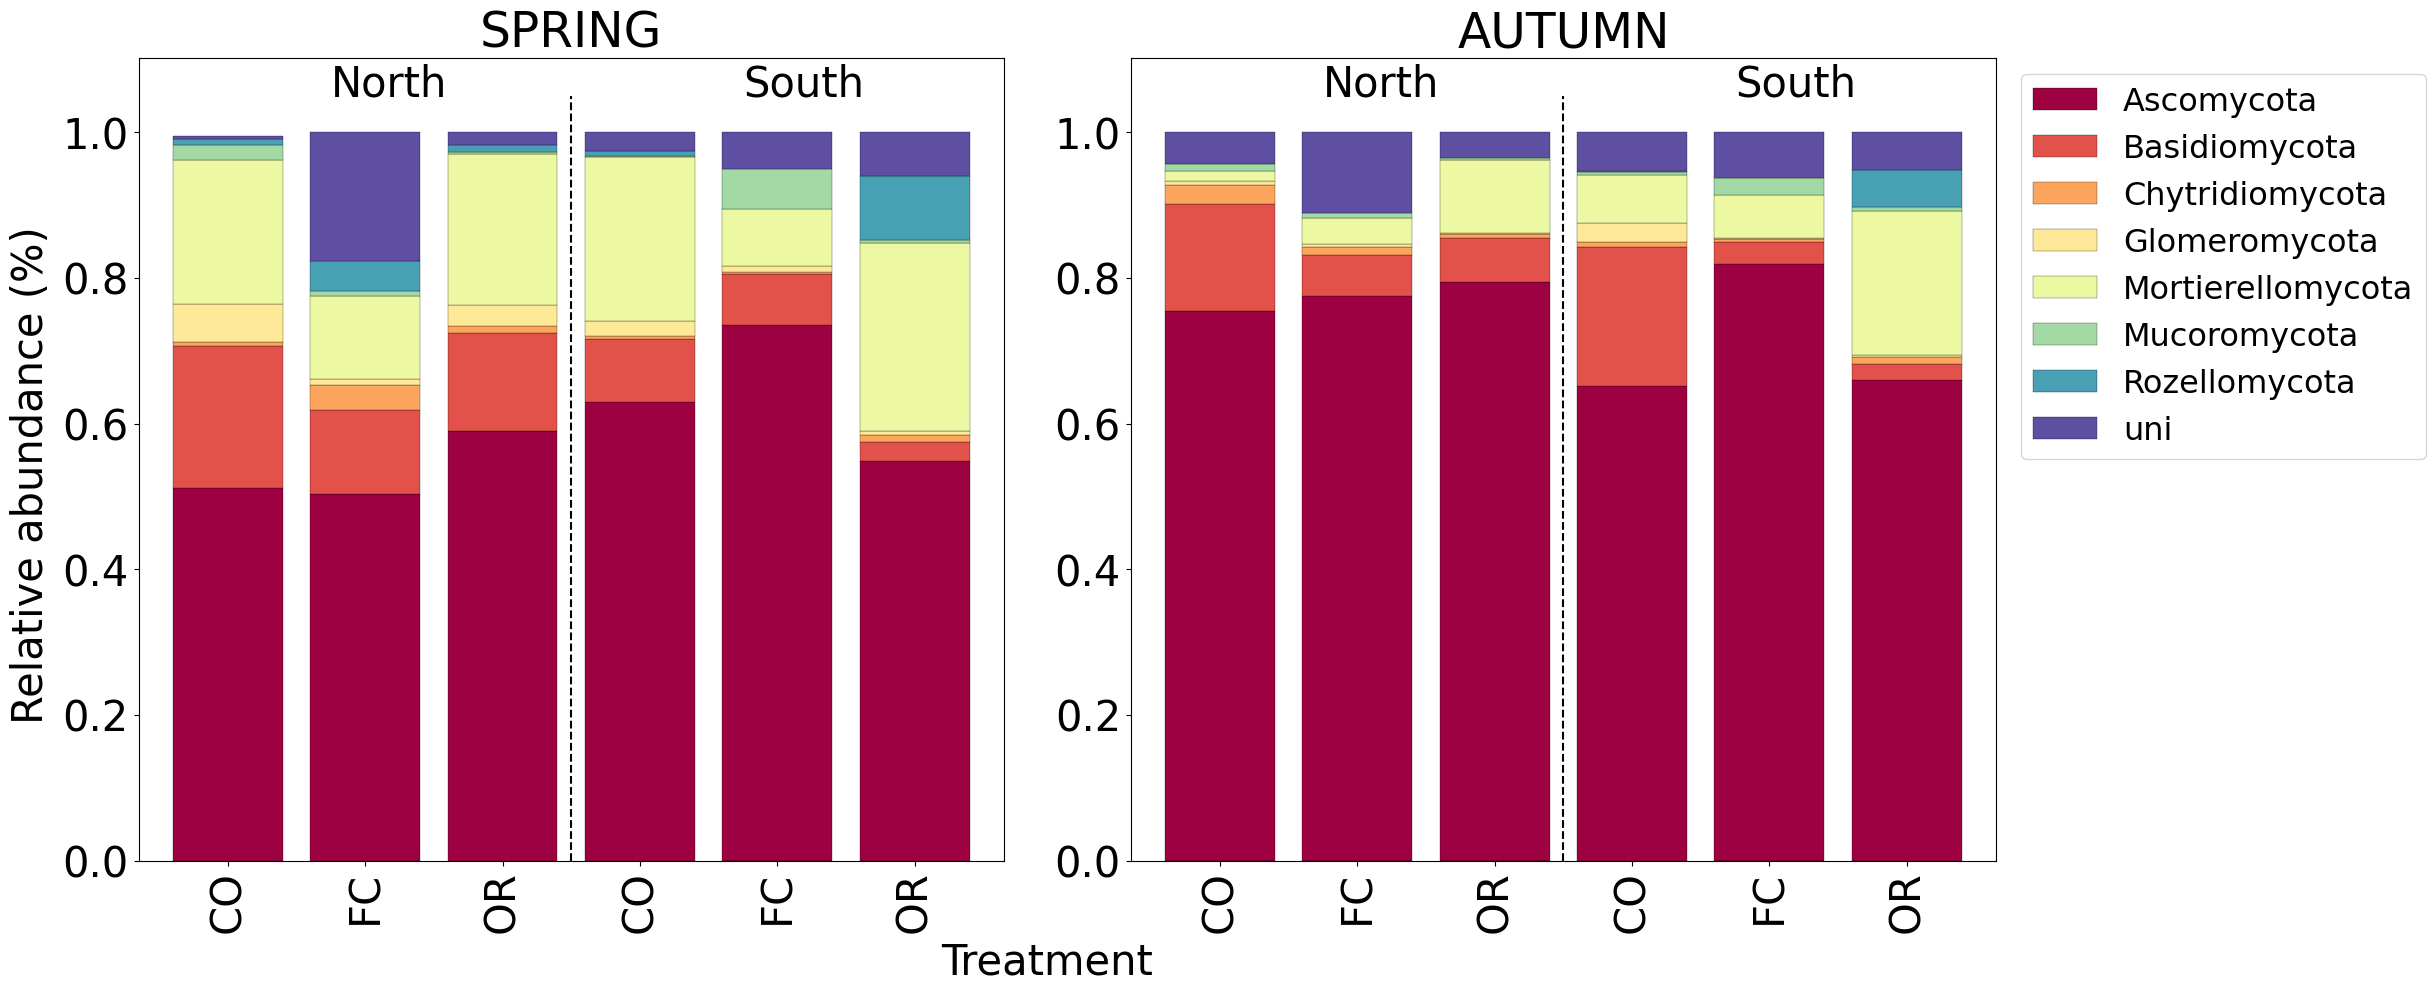

In [375]:
# AUT vs SPR, averaged over all the other factors

fig, ax = plt.subplots( 1, 2, figsize = ( 2*10, 10 ) )

# dropping also Olpidiomycota here, to few non-zero entries
df_group = df_ab[["SITE",
                  "TREAT", 
                  "Season",
                  'Ascomycota', 
                  'Basidiomycota',
                  'Chytridiomycota',
                  'Glomeromycota',
                  'Mortierellomycota',
                  'Mucoromycota',
                  'Rozellomycota',
                  'uni']]

df_group = df_group.groupby(["Season", "SITE", "TREAT"]).mean()

col = sns.color_palette("hls", 11)

df_group.loc["SPR"].plot(kind='bar', stacked=True,
                         ax = ax[0], width=0.8,
                         edgecolor="black", lw=0.2,
                         legend = False, colormap = 'Spectral')

ax[0].set_xlabel("Treatment", fontsize = 30)
ax[0].set_ylabel("Relative abundance (%)", fontsize = 30)
ax[0].plot([2.5,2.5], [0,1.05], 'k--')
ax[0].text(0.75, 1.05, "North", fontsize = 30)
ax[0].text(0.75+3, 1.05, "South", fontsize = 30)
ax[0].set_title("SPRING", fontsize = 35)
ax[0].set_xticklabels(2*["CO", "FC", "OR"])
ax[0].tick_params(axis='both', which='major', labelsize=30)
ax[0].xaxis.set_label_coords(1.05, -0.1)
ax[0].yaxis.set_label_coords(-0.1, 0.48)

df_group.loc["AUT"].plot(kind='bar', stacked=True,
                         ax = ax[1], width=0.8,
                         edgecolor="black", lw=0.2,
                         legend = True, colormap = 'Spectral')

ax[1].set_xlabel("", fontsize = 25)
#ax[1].set_ylabel("Relative abundance (%)", fontsize = 25)
ax[1].plot([2.5,2.5], [0,1.05], 'k--')
ax[1].text(0.75, 1.05, "North", fontsize = 30)
ax[1].text(0.75+3, 1.05, "South", fontsize = 30)
ax[1].set_title("AUTUMN", fontsize = 35)
ax[1].set_xticklabels(2*["CO", "FC", "OR"])
ax[1].tick_params(axis='both', which='major', labelsize=30)
ax[1].xaxis.set_label_coords(0.5, -0.2)
ax[1].yaxis.set_label_coords(-0.1, 0.5)

fig.tight_layout()

ax[1].legend(bbox_to_anchor=(1.01, 1), loc='upper left', fontsize = 23)
#ax.set_ylim([0, 1])

#plt.savefig("stacked_plots/stacked_complete.pdf", bbox_inches = 'tight')

# ABIOTIC BOXPLOT

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

FC_SPR vs. FC_AUT: t-test independent samples, P_val:4.376e-05 t=4.294e+00
CO_SPR vs. CO_AUT: t-test independent samples, P_val:3.113e-05 t=4.375e+00
OR_SPR vs. OR_AUT: t-test independent samples, P_val:1.424e-03 t=3.285e+00
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

OR_SPR vs. OR_AUT: t-test independent samples, P_val:4.216e-02 t=2.059e+00
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

OR_SPR vs. OR_AUT: t-test independent samples, P_val:3.020e-08 t=-6.032e+00
p-value annotation legend:
      ns: 5.00e-02 < 

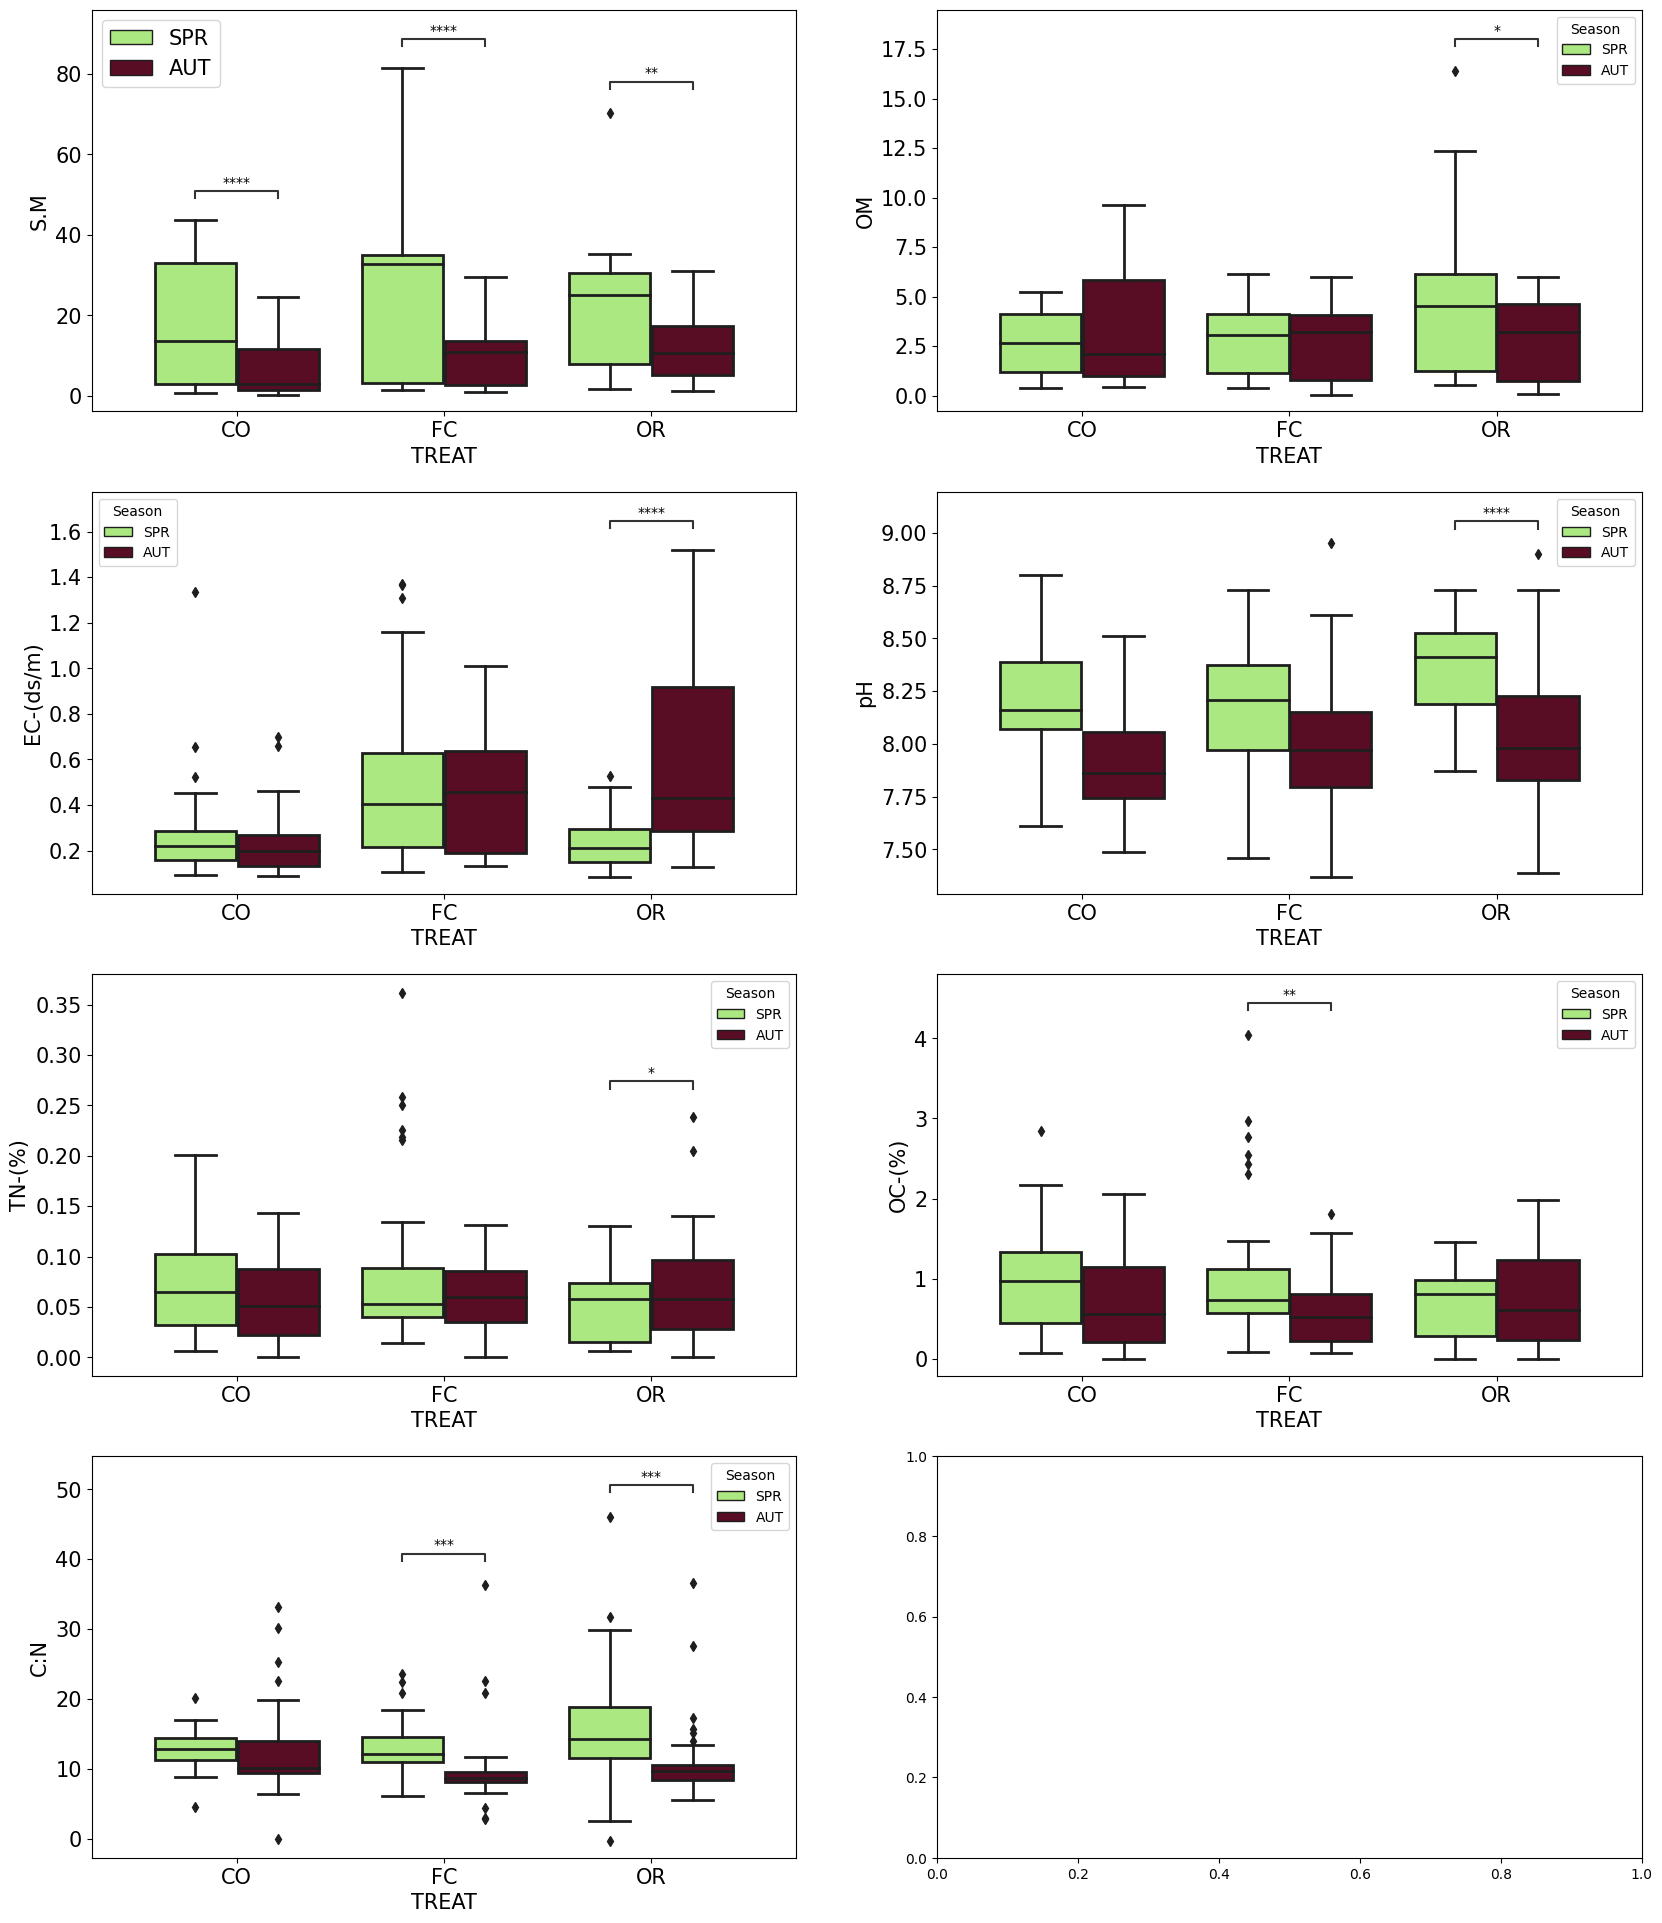

In [376]:
fig, ax = plt.subplots(4,2, figsize = (2*10, 4*6))
ax = ax.reshape(-1)

palette = {"SPR": "#a9f971", "AUT": "#650021"}

df_ab = df_ab.rename(columns={"S.M": "SM", "EC-(ds/m)": "EC", "TN-(%)" : "TN", "OC-(%)" : "OC", "C:N" : "CN"})
df_ab_mod = df_ab_mod.rename(columns={"S.M": "SM", "EC-(ds/m)": "EC", "TN-(%)" : "TN", "OC-(%)" : "OC", "C:N" : "CN"})

for i, ab in enumerate( ["SM", "OM", "EC", "pH", 'TN', 'OC', 'CN'] ):

    plotting_parameters = {
        'data':    df_ab,
        'x':       'TREAT',
        'y':       ab,
        'hue':     'Season'
    }
    
    if i == 0:
        ax[i] = sns.boxplot(**plotting_parameters, ax=ax[i], palette = palette, linewidth=2)
        ax[i].legend(fontsize = 15)
    else:   
        ax[i] = sns.boxplot(**plotting_parameters, ax=ax[i], palette = palette, linewidth=2)

    pairs = [(("CO", "SPR"),("CO", "AUT")),
            (("FC", "SPR"),("FC", "AUT")),
            (("OR", "SPR"),("OR", "AUT"))]
    
    plotting_parameters = {
        'data':    df_ab_mod,
        'x':       'TREAT',
        'y':       ab,
        'hue':     'Season'
    }

    annotator = Annotator(ax[i], pairs, **plotting_parameters)
    annotator.configure(text_format='star', test='t-test_ind', hide_non_significant=True)
    annotator.apply_and_annotate()
    
    ax[i].tick_params(labelsize = 15)
    ax[i].set_ylabel(abiotic[i], fontsize = 15)
    ax[i].set_xlabel("TREAT", fontsize = 15)
    
#plt.savefig("abiotic_boxplot_less_Annot.pdf", bbox_inches = 'tight')    

# PHYLA BOXPLOT

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

FC_SPR vs. FC_AUT: t-test independent samples, P_val:1.331e-05 t=-4.606e+00
CO_SPR vs. CO_AUT: t-test independent samples, P_val:3.697e-03 t=-2.977e+00
OR_SPR vs. OR_AUT: t-test independent samples, P_val:2.455e-04 t=-3.810e+00
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

CO_SPR vs. CO_AUT: t-test independent samples, P_val:1.829e-05 t=4.513e+00
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

CO_SPR vs. CO_AUT: t-test independent samples, P_val:3.712e-04 t=-3.692e+00
p-value annotation legend:
      ns: 5.00e-02

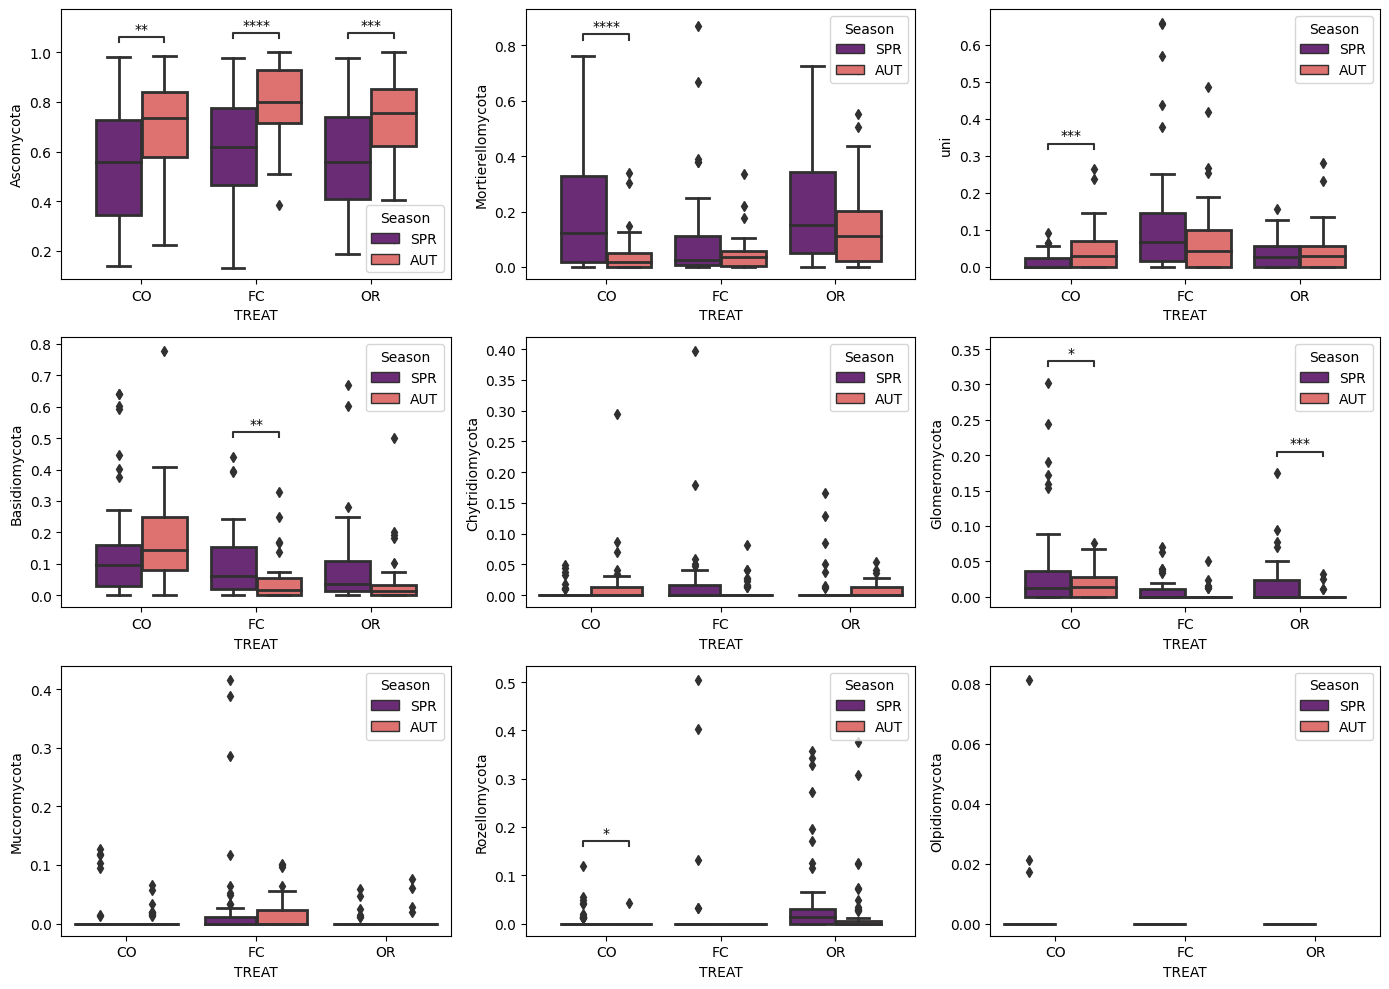

In [377]:
fig, axx = plt.subplots(3, 3, figsize=(14, 10), tight_layout=True)
axx = axx.reshape(-1)
colors = ['crimson', 'navy', 'orange']

pairs = [(("CO", "SPR"),("CO", "AUT")),
        (("FC", "SPR"),("FC", "AUT")),
        (("OR", "SPR"),("OR", "AUT"))]

p_values = np.zeros(3)

for ax, node in zip(axx, phyla_list):
    plotting_parameters = {
        'data':    df_ab,
        'x':       'TREAT',
        'y':       node,
        'hue':     'Season'
    }
    
    ax = sns.boxplot(**plotting_parameters, ax=ax, palette = "magma", linewidth=2)     

    annotator = Annotator(ax, pairs, **plotting_parameters)
    annotator.configure(text_format='star', test='t-test_ind', hide_non_significant=True)
    annotator.apply_and_annotate()

    #plt.savefig("phyla_boxplot.pdf", bbox_inches = 'tight')

# RICHNESS/SHANNON INDEX BOXPLOT

In [378]:
# prepare dataframe with genera abundances

# drop last columns, then keep only first 4 columns and all the genera columns
df_genera = df.iloc[:, :-5]
df_genera_1 = df_genera[['Season','TREAT']]
df_genera_2 = df_genera.iloc[:, 25:]
df_genera = pd.concat( [df_genera_1, df_genera_2], axis=1 )

In [379]:
norm=df_genera.iloc[:, 2:].sum(axis=1, numeric_only=True)

# remove zero rows
df_genera=df_genera.iloc[norm[norm.values>0.].index]
df_genera = drop_zero_cols(df_genera)

norm=norm[norm.values>0.]

for col in df_genera.columns[2:]:
    df_genera[col]=df_genera[col]/norm  

# we replace nan with zeros

df_genera = df_genera.fillna(0.)

df_genera = df_genera.replace(" ", 0)    

In [380]:
df_genera.insert(2, "Shannon_Index", np.zeros(len(df_genera)), True)
df_genera.insert(2, "Richness", np.zeros(len(df_genera)), True)
df_genera = df_genera.reset_index(drop=True)

In [381]:
for i in range(len(df_genera)):
    df_genera.at[i, "Shannon_Index"] = shannon_idx( df_genera.iloc[i, 2:]) 
    df_genera.at[i, "Richness"] = richness( df_genera.iloc[i, 2:]) 

In [382]:
df_ab_mod.insert(2, "Shannon_Index", np.zeros(len(df_ab_mod)), True)
df_ab_mod.insert(2, "Richness", np.zeros(len(df_ab_mod)), True)

df_ab_mod = df_ab_mod.reset_index(drop=True)

In [383]:
for i in range(len(df_ab)):
    df_ab_mod.at[i, "Shannon_Index"] = shannon_idx( df_ab_mod.iloc[i, 12:]) 
    df_ab_mod.at[i, "Richness"] = richness( df_ab_mod.iloc[i, 12:]) 

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

FC_SPR vs. FC_AUT: t-test independent samples, P_val:6.855e-03 t=2.767e+00
OR_SPR vs. OR_AUT: t-test independent samples, P_val:1.243e-02 t=2.548e+00
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

FC_SPR vs. FC_AUT: t-test independent samples, P_val:2.363e-04 t=3.829e+00
OR_SPR vs. OR_AUT: t-test independent samples, P_val:6.465e-04 t=3.527e+00
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

CO_SPR vs. CO_AUT: t-test independent samples, P_val:1.173e-02 t=-2.570e+00
p-value annotation legend:
      ns: 5.00e-02 < 

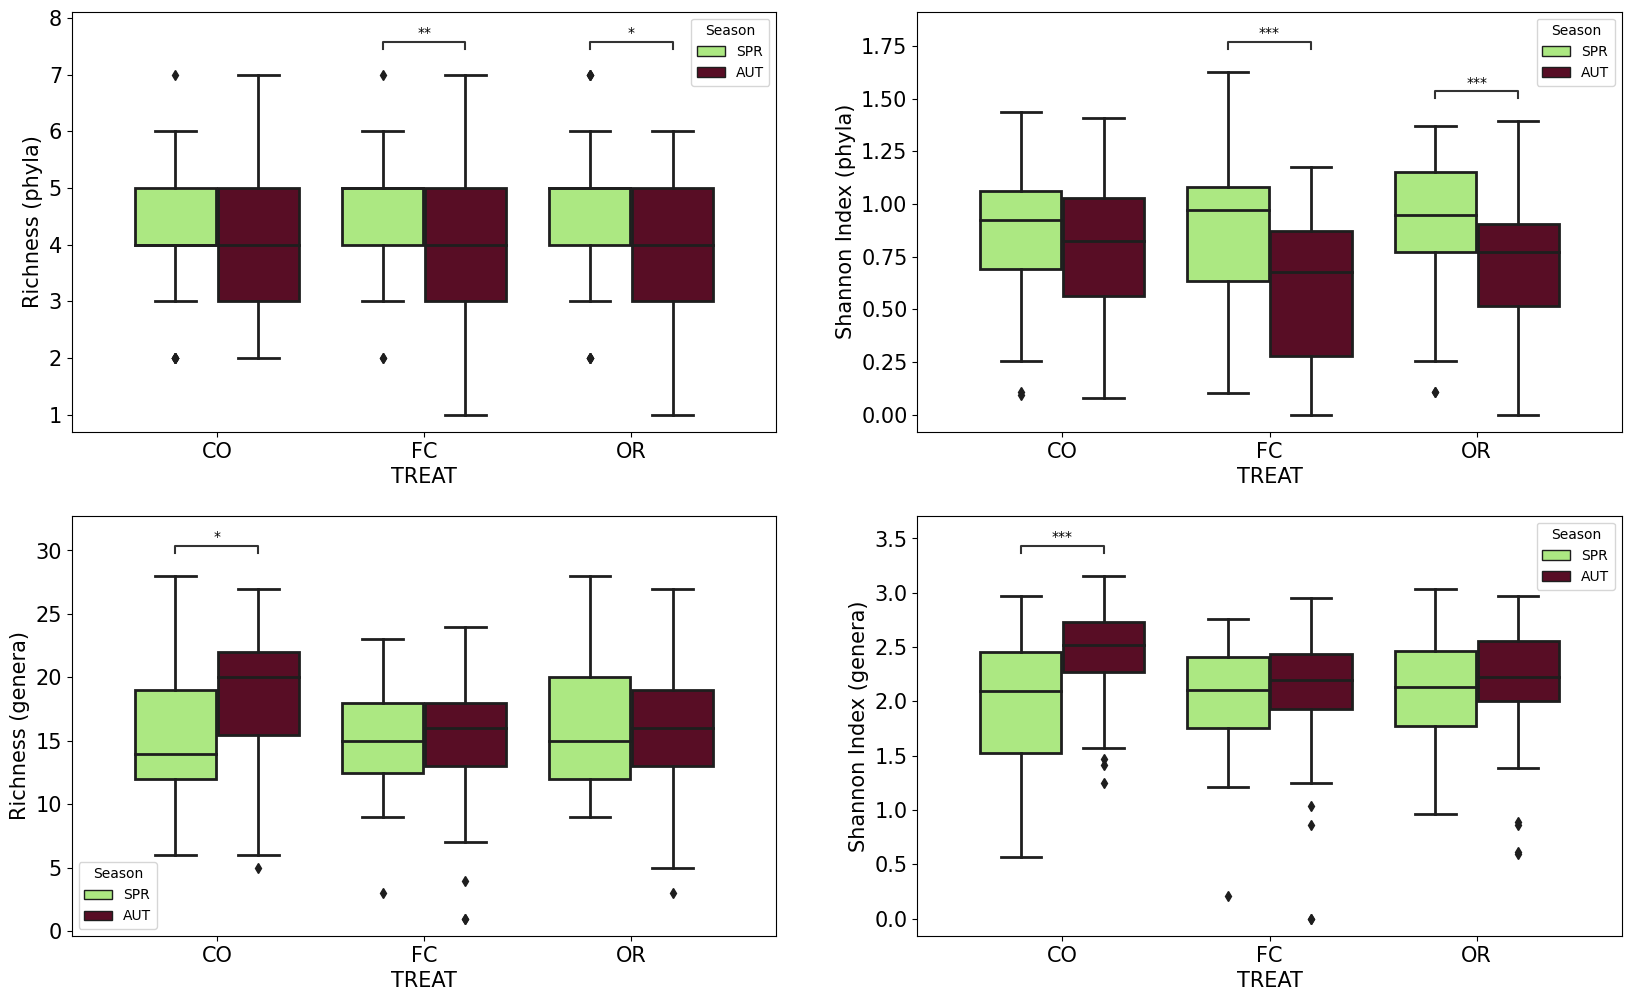

In [384]:
fig, ax = plt.subplots(2,2, figsize = (2*10, 2*6))
ax = ax.reshape(-1)

palette = {"SPR": "#a9f971", "AUT": "#650021"}

for i, ab in enumerate( ["Richness", "Shannon_Index"] ):

    plotting_parameters = {
        'data':    df_ab_mod,
        'x':       'TREAT',
        'y':       ab,
        'hue':     'Season'
    }
    
    ax[i] = sns.boxplot(**plotting_parameters, ax=ax[i], palette = palette, linewidth=2)

    pairs = [(("CO", "SPR"),("CO", "AUT")),
            (("FC", "SPR"),("FC", "AUT")),
            (("OR", "SPR"),("OR", "AUT"))]

    annotator = Annotator(ax[i], pairs, **plotting_parameters)
    annotator.configure(text_format='star', test='t-test_ind', hide_non_significant=True)
    annotator.apply_and_annotate()
    
    ax[i].tick_params(labelsize = 15)
    ax[i].set_xlabel("TREAT", fontsize = 15)

    ax[0].set_ylabel("Richness (phyla)", fontsize = 15)
    ax[1].set_ylabel("Shannon Index (phyla)", fontsize = 15)

for i, ab in enumerate( ["Richness", "Shannon_Index"] ):

    plotting_parameters = {
        'data':    df_genera,
        'x':       'TREAT',
        'y':       ab,
        'hue':     'Season'
    }
    
    ax[i+2] = sns.boxplot(**plotting_parameters, ax=ax[i+2], palette = palette, linewidth=2)

    pairs = [(("CO", "SPR"),("CO", "AUT")),
            (("FC", "SPR"),("FC", "AUT")),
            (("OR", "SPR"),("OR", "AUT"))]
    
    annotator = Annotator(ax[i+2], pairs, **plotting_parameters)
    annotator.configure(text_format='star', test='t-test_ind', hide_non_significant=True)
    annotator.apply_and_annotate()
    
    ax[i+2].tick_params(labelsize = 15)
    ax[i+2].set_xlabel("TREAT", fontsize = 15)
    
    ax[2].set_ylabel("Richness (genera)", fontsize = 15)
    ax[3].set_ylabel("Shannon Index (genera)", fontsize = 15)

# PRODUCE TABLE of ABIOTIC with MEAN and ERROR 

In [385]:
df_spr = df_ab_mod[ df_ab_mod["Season"] == "SPR" ]
df_aut = df_ab_mod[ df_ab_mod["Season"] == "AUT" ]

In [386]:
# Compute mean and standard error of phyla abundances, abiotic parameters and community indices (shannon's entropy and richness)

means_spr = df_spr.drop(columns = ["SITE", "Season"]).groupby(["TREAT"]).mean()
stds_spr = df_spr.drop(columns = ["SITE", "Season"]).groupby(["TREAT"]).std()

means_aut = df_aut.drop(columns = ["SITE", "Season"]).groupby(["TREAT"]).mean()
stds_aut = df_aut.drop(columns =["SITE", "Season"]).groupby(["TREAT"]).std()

num_samples = len( df_aut[ df_aut["TREAT"] == "FC"] )

err_spr = stds_spr/np.sqrt(num_samples)
err_aut = stds_aut/np.sqrt(num_samples)

means_spr.replace(0.00, 0.01, inplace = True)
means_aut.replace(0.00, 0.01, inplace = True)

err_spr.replace(0.00, 0.01, inplace = True)
err_aut.replace(0.00, 0.01, inplace = True)

In [387]:
# write a table and print it in latex format (SPRING)

table = means_spr.combine(err_spr, lambda x, y: np.array([f"{x[i]:.2f} $\pm$ {y[i]:.2f}" for i in range(3)]))
latex_table = table.T.to_latex(escape=False)
print(latex_table)

\begin{tabular}{llll}
\toprule
TREAT &                CO &                FC &                OR \\
\midrule
Richness          &   4.24 $\pm$ 0.19 &   4.49 $\pm$ 0.17 &   4.69 $\pm$ 0.19 \\
Shannon_Index     &   0.86 $\pm$ 0.05 &   0.87 $\pm$ 0.05 &   0.92 $\pm$ 0.05 \\
SM                &  17.66 $\pm$ 2.22 &  23.08 $\pm$ 2.90 &  19.53 $\pm$ 2.16 \\
OM                &   2.67 $\pm$ 0.24 &   2.80 $\pm$ 0.26 &   4.12 $\pm$ 0.53 \\
EC                &   0.25 $\pm$ 0.03 &   0.46 $\pm$ 0.05 &   0.24 $\pm$ 0.02 \\
pH                &   8.07 $\pm$ 0.18 &   8.02 $\pm$ 0.18 &   8.36 $\pm$ 0.03 \\
TN                &   0.07 $\pm$ 0.01 &   0.08 $\pm$ 0.01 &   0.05 $\pm$ 0.01 \\
OC                &   0.92 $\pm$ 0.10 &   0.96 $\pm$ 0.12 &   0.68 $\pm$ 0.06 \\
CN                &  12.34 $\pm$ 0.54 &  12.77 $\pm$ 0.60 &  15.37 $\pm$ 1.19 \\
Ascomycota        &   0.57 $\pm$ 0.04 &   0.61 $\pm$ 0.03 &   0.57 $\pm$ 0.03 \\
Basidiomycota     &   0.14 $\pm$ 0.03 &   0.09 $\pm$ 0.02 &   0.08 $\pm$ 0.02 \\


C:\Users\edo13\AppData\Local\Temp\ipykernel_10332\2869387880.py:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = table.T.to_latex(escape=False)


In [388]:
# write a table and print it in latex format (AUTUMN)

table = means_aut.combine(err_aut, lambda x, y: np.array([f"{x[i]:.2f} $\pm$ {y[i]:.2f}" for i in range(3)]))
latex_table = table.T.to_latex(escape=False)
print(latex_table)

\begin{tabular}{llll}
\toprule
TREAT &                CO &               FC &                OR \\
\midrule
Richness          &   4.35 $\pm$ 0.23 &  3.74 $\pm$ 0.23 &   4.02 $\pm$ 0.21 \\
Shannon_Index     &   0.80 $\pm$ 0.05 &  0.60 $\pm$ 0.06 &   0.70 $\pm$ 0.05 \\
SM                &   7.17 $\pm$ 1.08 &  9.82 $\pm$ 1.16 &  11.82 $\pm$ 1.26 \\
OM                &   3.30 $\pm$ 0.39 &  2.62 $\pm$ 0.27 &   2.95 $\pm$ 0.31 \\
EC                &   0.22 $\pm$ 0.02 &  0.43 $\pm$ 0.04 &   0.60 $\pm$ 0.06 \\
pH                &   7.91 $\pm$ 0.04 &  7.64 $\pm$ 0.27 &   8.04 $\pm$ 0.05 \\
TN                &   0.06 $\pm$ 0.01 &  0.06 $\pm$ 0.01 &   0.07 $\pm$ 0.01 \\
OC                &   0.72 $\pm$ 0.09 &  0.59 $\pm$ 0.07 &   0.74 $\pm$ 0.09 \\
CN                &  11.19 $\pm$ 1.13 &  9.01 $\pm$ 0.92 &   9.69 $\pm$ 0.95 \\
Ascomycota        &   0.70 $\pm$ 0.03 &  0.80 $\pm$ 0.02 &   0.72 $\pm$ 0.03 \\
Basidiomycota     &   0.17 $\pm$ 0.02 &  0.04 $\pm$ 0.01 &   0.04 $\pm$ 0.01 \\
Chytridiomyc

C:\Users\edo13\AppData\Local\Temp\ipykernel_10332\749340086.py:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = table.T.to_latex(escape=False)


# DUNCAN TEST for DIFFERENCES AMONG PAIRS OF TREATMENTS

In [389]:
# select season
season  = "AUT"

parameter = "TREAT"

nodes =  ["SM",
          "OM", 
          "EC", 
          "pH", 
          'TN', 
          'OC', 
          'CN',
          'Richness',
          'Shannon_Index',
          'Ascomycota', 
          'Basidiomycota',
          'Chytridiomycota',
          'Glomeromycota',
          'Mortierellomycota',
          'Mucoromycota',
          'Rozellomycota',
          'Olpidiomycota',
          'uni']

for node in nodes:
    if season == "SPR":
        result, anova_table = duncan_test(df_spr, node, parameter)
    elif season == "AUT":
        result, anova_table = duncan_test(df_aut, node, parameter)

    print(node)
    print(result)
    print()

SM
TREAT     CO     FC     OR
TREAT                     
CO     False  False   True
FC     False  False  False
OR     False  False  False

OM
TREAT     CO     FC     OR
TREAT                     
CO     False  False  False
FC     False  False  False
OR     False  False  False

EC
TREAT     CO     FC     OR
TREAT                     
CO     False   True   True
FC     False  False   True
OR     False  False  False

pH
TREAT     CO     FC     OR
TREAT                     
CO     False  False  False
FC     False  False  False
OR     False  False  False

TN
TREAT     CO     FC     OR
TREAT                     
CO     False  False  False
FC     False  False  False
OR     False  False  False

OC
TREAT     CO     FC     OR
TREAT                     
CO     False  False  False
FC     False  False  False
OR     False  False  False

CN
TREAT     CO     FC     OR
TREAT                     
CO     False  False  False
FC     False  False  False
OR     False  False  False

Richness
TREAT     CO     F

C:\Users\edo13\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 0
  warnings.warn('covariance of constraints does not have full '


# RDA Table

In [390]:
# results from permanova test in R 

# Define the data as a dictionary
data = {
    "Factor": [
        "SITE", "TREAT", "Season", "S.M", "OM", 
        "EC-(ds/m)", "pH", "TN-(%)", "OC-(%)", "C:N", "Residual"
    ],
    "Df": [1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 276],
    "Variance (%)": [
        13.370016, 63.245084, 86.204008, 20.511613, 7.709903, 
        3.701730, 4.187200, 6.529559, 5.220867, 3.330829, 956.283632
    ],
    "F": [
        3.8588178, 9.1268127, 24.8799680, 5.9200064, 2.2252115, 
        1.0683833, 1.2084984, 1.8845436, 1.5068324, 0.9613348, None
    ],
    "Pr(>F)": [
        0.023, 0.001, 0.001, 0.003, 0.086, 
        0.337, 0.276, 0.142, 0.190, 0.391, None
    ]
}

# Convert to a DataFrame
permanova_table = pd.DataFrame(data)

In [391]:
tot_var = 1170.3 # from rda in R 
permanova_table["Variance (%)"] = permanova_table["Variance (%)"]/tot_var 

In [392]:
permanova_table_latex = permanova_table.to_latex(escape=False)
print(permanova_table_latex)

\begin{tabular}{llrrrr}
\toprule
{} &     Factor &   Df &  Variance (%) &          F &  Pr(>F) \\
\midrule
0  &       SITE &    1 &      0.011424 &   3.858818 &   0.023 \\
1  &      TREAT &    2 &      0.054042 &   9.126813 &   0.001 \\
2  &     Season &    1 &      0.073660 &  24.879968 &   0.001 \\
3  &        S.M &    1 &      0.017527 &   5.920006 &   0.003 \\
4  &         OM &    1 &      0.006588 &   2.225211 &   0.086 \\
5  &  EC-(ds/m) &    1 &      0.003163 &   1.068383 &   0.337 \\
6  &         pH &    1 &      0.003578 &   1.208498 &   0.276 \\
7  &     TN-(%) &    1 &      0.005579 &   1.884544 &   0.142 \\
8  &     OC-(%) &    1 &      0.004461 &   1.506832 &   0.190 \\
9  &        C:N &    1 &      0.002846 &   0.961335 &   0.391 \\
10 &   Residual &  276 &      0.817127 &        NaN &     NaN \\
\bottomrule
\end{tabular}



C:\Users\edo13\AppData\Local\Temp\ipykernel_10332\293227030.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  permanova_table_latex = permanova_table.to_latex(escape=False)


# PHYLA ABUNDANCES ARE WEAKLY DEPENDENT ON SITE ...

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

N vs. S: t-test independent samples, P_val:6.951e-04 t=3.429e+00
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03


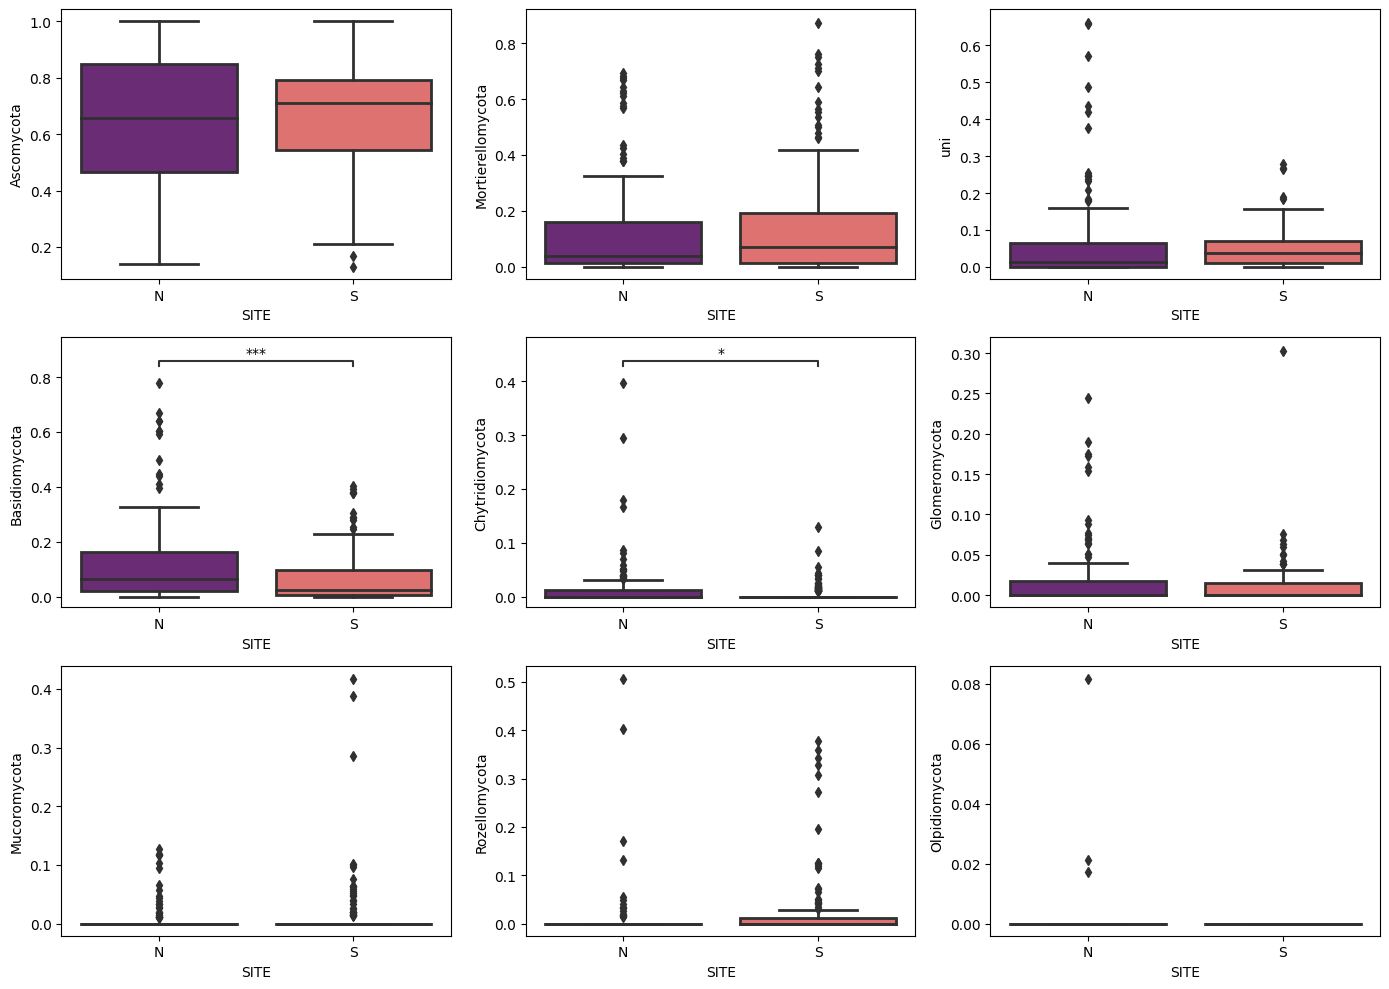

In [395]:
fig, axx = plt.subplots(3, 3, figsize=(14, 10), tight_layout=True)
axx = axx.reshape(-1)

pairs = [("N", "S")]

for ax, node in zip(axx, phyla_list):

    plotting_parameters = {
        'data':    df_ab,
        'x':       'SITE',
        'y':       node
    }
    
    ax = sns.boxplot(**plotting_parameters, ax=ax, palette = "magma", linewidth=2)     

    annotator = Annotator(ax, pairs, **plotting_parameters)
    annotator.configure(text_format='star', test='t-test_ind', hide_non_significant=True)
    annotator.apply_and_annotate()

## but if we compare without averaging over the seasons, the differences are not so small

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

N_SPR vs. S_SPR: t-test independent samples, P_val:4.452e-03 t=-2.887e+00
N_AUT vs. S_AUT: t-test independent samples, P_val:2.791e-02 t=2.224e+00
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

N_AUT vs. S_AUT: t-test independent samples, P_val:7.706e-03 t=-2.707e+00
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

N_SPR vs. S

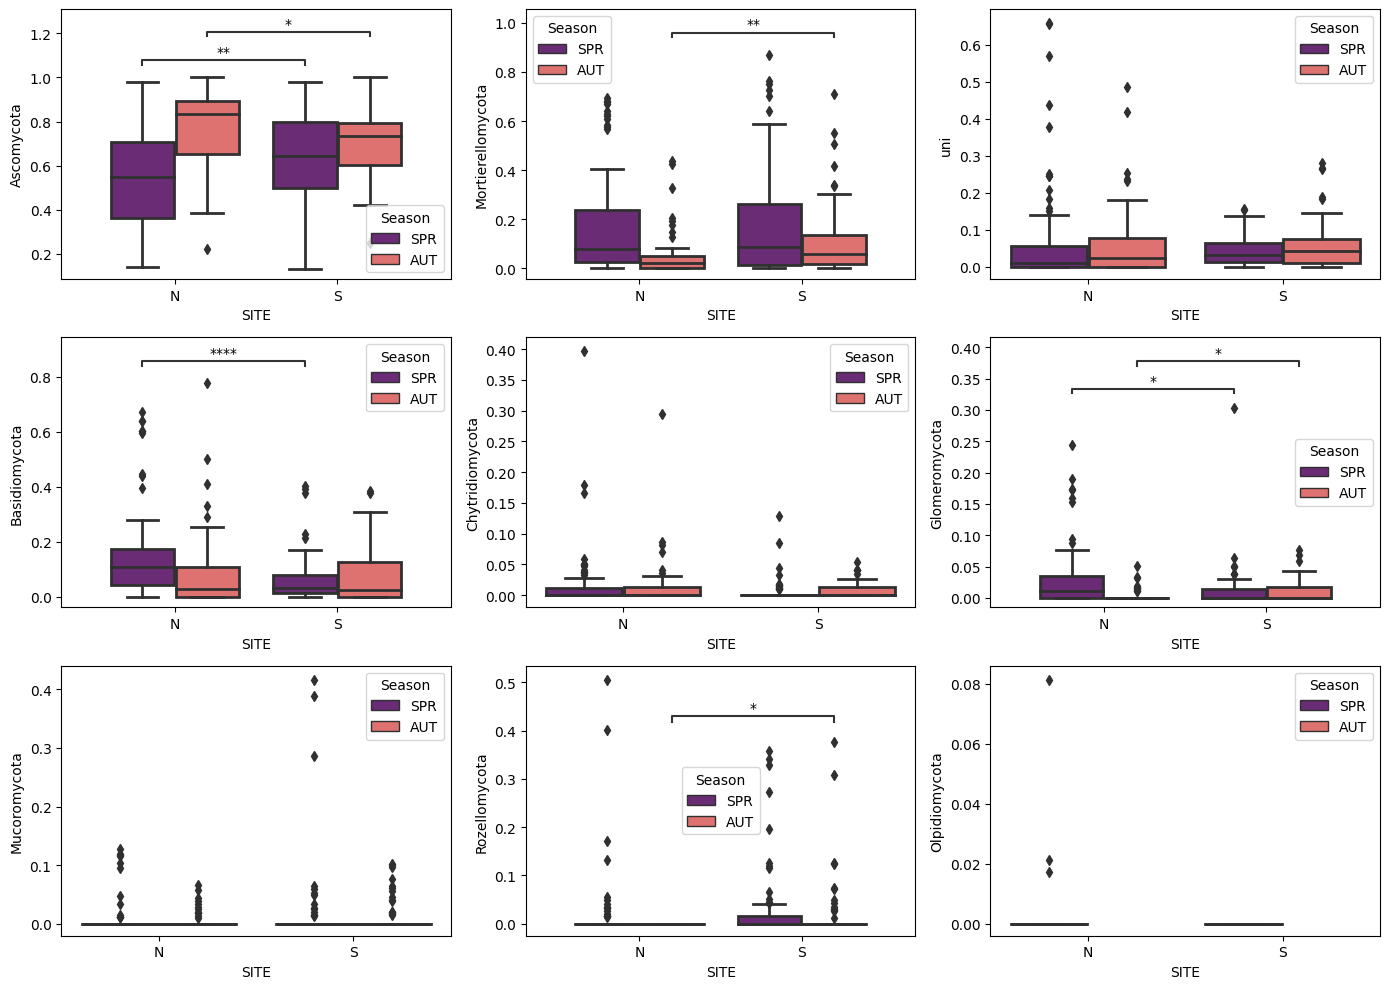

In [394]:
fig, axx = plt.subplots(3, 3, figsize=(14, 10), tight_layout=True)
axx = axx.reshape(-1)

pairs = [(("N", "SPR"),("S", "SPR")),
        (("N", "AUT"),("S", "AUT"))]

for ax, node in zip(axx, phyla_list):

    plotting_parameters = {
        'data':    df_ab,
        'x':       'SITE',
        'y':       node,
        'hue': "Season"
    }
    
    ax = sns.boxplot(**plotting_parameters, ax=ax, palette = "magma", linewidth=2)     

    annotator = Annotator(ax, pairs, **plotting_parameters)
    annotator.configure(text_format='star', test='t-test_ind', hide_non_significant=True)
    annotator.apply_and_annotate()